In [1]:
import csv
# import colorsys
import math
import pandas as pd
# import matplotlib.pyplot as plt
import pytz
import datetime
import matplotlib.pyplot as plt
from polars.dependencies import subprocess
import matplotlib.transforms as mtransforms
import numpy as np
import seaborn as sns
from algorithm.per_item import Accuracy_workload as workload

import seaborn as sns


In [2]:


import os

plt.rcParams['font.family'] = 'arial'

sns.set_palette("Paired")
sns.set_context("paper", font_scale=1.6)




def get_integer(alpha):
    while not math.isclose(alpha, round(alpha), rel_tol=1e-9):  # Use a small tolerance
        alpha *= 10
    return int(alpha)


method_name = "hoeffding_classifier"
data = pd.read_csv('../../../../../result_' + method_name + '.csv', dtype={"zip_code": str})
print(data["gender"].unique())
date_column = "datetime"
# get distribution of compas_screening_date
data[date_column] = pd.to_datetime(data[date_column])
print(data[date_column].min(), data[date_column].max())
date_time_format = True
# time_window_str = "1 month"
monitored_groups = [{"gender": 'M'}, {"gender": 'F'}]
print(data[:5])
alpha = 0.993

threshold = 0.3
label_prediction = "prediction"
label_ground_truth = "rating"
correctness_column = "diff_binary_correctness"
use_two_counters = True
time_unit = "1 hour"
window_size_units = "24"
checking_interval = "1 hour"
use_nanosecond = False


DFMonitor_bit, DFMonitor_counter, uf_list, accuracy_list, counter_list_correct, counter_list_incorrect, \
    window_reset_times, check_points, elapsed_time_DFMonitor_bit, elapsed_time_DFMonitor_counter, \
            total_time_insertion_bit, total_time_insertion_counter, \
            total_time_new_window_bit, total_time_new_window_counter, num_time_window \
    = workload.traverse_data_DFMonitor_and_baseline(data, date_column,
                                                    date_time_format,
                                                    monitored_groups,
                                                    threshold, alpha, time_unit, eval(window_size_units),
                                                    checking_interval, label_prediction,
                                                    label_ground_truth, correctness_column, use_nanosecond,
                                                    use_two_counters)







['M' 'F']
1997-09-20 05:05:10 1998-04-23 01:10:38
   user  item           timestamp                            title  \
0   259   255  874731910000000000  My Best Friend's Wedding (1997)   
1   259   286  874731927000000000      English Patient, The (1996)   
2   259   298  874731954000000000                  Face/Off (1997)   
3   259   185  874731981000000000                    Psycho (1960)   
4   259   173  874732043000000000       Princess Bride, The (1987)   

         release_date                              genres   age age_2groups  \
0  866764800000000000                     comedy, romance  21.0        7-30   
1  848016000000000000                 drama, romance, war  21.0        7-30   
2  867369600000000000            action, sci_fi, thriller  21.0        7-30   
3 -315619200000000000           horror, romance, thriller  21.0        7-30   
4  536457600000000000  action, adventure, comedy, romance  21.0        7-30   

  age_4groups gender occupation zip_code  rating  pred

In [3]:
print(len(counter_list_correct))
print(counter_list_correct[:5])

5156
[array([15.,  0.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.])]


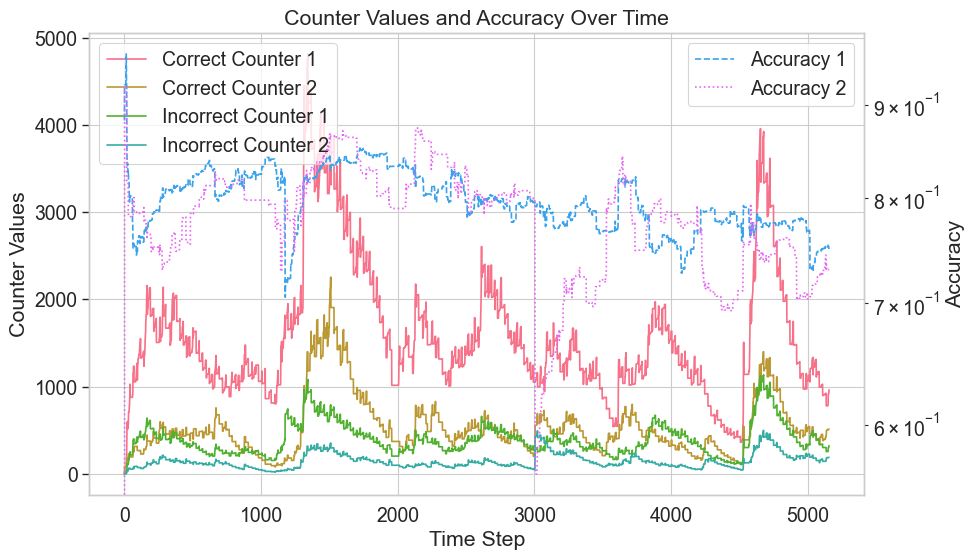

In [4]:



# Adjusting the plot to align both "counter values" and "accuracy" on a common x-axis

# Convert list of arrays to numpy arrays for easier plotting
counter_array_correct = np.array(counter_list_correct)
counter_array_incorrect = np.array(counter_list_incorrect)
accuracy_array = np.array(accuracy_list)

# Extracting individual counters for plotting
correct_counter_1 = counter_array_correct[:, 0]
correct_counter_2 = counter_array_correct[:, 1]
incorrect_counter_1 = counter_array_incorrect[:, 0]
incorrect_counter_2 = counter_array_incorrect[:, 1]
accuracy_1 = accuracy_array[:, 0]
accuracy_2 = accuracy_array[:, 1]
# Set a color palette
palette = sns.color_palette("husl")

# Plotting both counter values and accuracy on a common x-axis using subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot counters (correct and incorrect)
ax1.plot(correct_counter_1, label='Correct Counter 1', color=palette[0])
ax1.plot(correct_counter_2, label='Correct Counter 2', color=palette[1])
ax1.plot(incorrect_counter_1, label='Incorrect Counter 1', color=palette[2])
ax1.plot(incorrect_counter_2, label='Incorrect Counter 2', color=palette[3])
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Counter Values')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(accuracy_1, label='Accuracy 1', color=palette[4], linestyle='dashed')
ax2.plot(accuracy_2, label='Accuracy 2', color=palette[5], linestyle='dotted')
ax2.set_ylabel('Accuracy')
ax2.set_yscale('log')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Counter Values and Accuracy Over Time')
plt.grid(True)
plt.show()




# large window size: 2 weeks

In [5]:


import os

plt.rcParams['font.family'] = 'arial'

sns.set_palette("Paired")
sns.set_context("paper", font_scale=1.6)




def get_integer(alpha):
    while not math.isclose(alpha, round(alpha), rel_tol=1e-9):  # Use a small tolerance
        alpha *= 10
    return int(alpha)


method_name = "hoeffding_classifier"
data = pd.read_csv('../../../../../result_' + method_name + '.csv', dtype={"zip_code": str})
print(data["gender"].unique())
date_column = "datetime"
# get distribution of compas_screening_date
data[date_column] = pd.to_datetime(data[date_column])
print(data[date_column].min(), data[date_column].max())
date_time_format = True
# time_window_str = "1 month"
monitored_groups = [{"gender": 'M'}, {"gender": 'F'}]
print(data[:5])
alpha = 0.993

threshold = 0.3
label_prediction = "prediction"
label_ground_truth = "rating"
correctness_column = "diff_binary_correctness"
use_two_counters = True
time_unit = "1 hour"
window_size_units = "24*7*2"
checking_interval = "1 hour"
use_nanosecond = False


DFMonitor_bit, DFMonitor_counter, uf_list, accuracy_list, counter_list_correct, counter_list_incorrect, \
    window_reset_times, check_points, elapsed_time_DFMonitor_bit, elapsed_time_DFMonitor_counter, \
            total_time_insertion_bit, total_time_insertion_counter, \
            total_time_new_window_bit, total_time_new_window_counter, num_time_window \
    = workload.traverse_data_DFMonitor_and_baseline(data, date_column,
                                                    date_time_format,
                                                    monitored_groups,
                                                    threshold, alpha, time_unit, eval(window_size_units),
                                                    checking_interval, label_prediction,
                                                    label_ground_truth, correctness_column, use_nanosecond,
                                                    use_two_counters)







['M' 'F']
1997-09-20 05:05:10 1998-04-23 01:10:38
   user  item           timestamp                            title  \
0   259   255  874731910000000000  My Best Friend's Wedding (1997)   
1   259   286  874731927000000000      English Patient, The (1996)   
2   259   298  874731954000000000                  Face/Off (1997)   
3   259   185  874731981000000000                    Psycho (1960)   
4   259   173  874732043000000000       Princess Bride, The (1987)   

         release_date                              genres   age age_2groups  \
0  866764800000000000                     comedy, romance  21.0        7-30   
1  848016000000000000                 drama, romance, war  21.0        7-30   
2  867369600000000000            action, sci_fi, thriller  21.0        7-30   
3 -315619200000000000           horror, romance, thriller  21.0        7-30   
4  536457600000000000  action, adventure, comedy, romance  21.0        7-30   

  age_4groups gender occupation zip_code  rating  pred

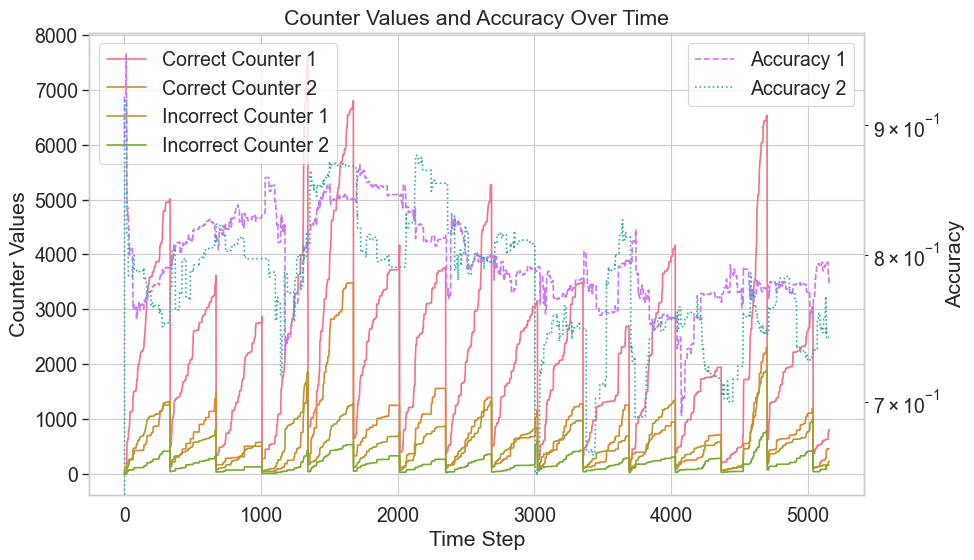

In [6]:



# Adjusting the plot to align both "counter values" and "accuracy" on a common x-axis

# Convert list of arrays to numpy arrays for easier plotting
counter_array_correct = np.array(counter_list_correct)
counter_array_incorrect = np.array(counter_list_incorrect)
accuracy_array = np.array(accuracy_list)

# Extracting individual counters for plotting
correct_counter_1 = counter_array_correct[:, 0]
correct_counter_2 = counter_array_correct[:, 1]
incorrect_counter_1 = counter_array_incorrect[:, 0]
incorrect_counter_2 = counter_array_incorrect[:, 1]
accuracy_1 = accuracy_array[:, 0]
accuracy_2 = accuracy_array[:, 1]
# Set a color palette
palette = sns.color_palette("husl", 10)

# Plotting both counter values and accuracy on a common x-axis using subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot counters (correct and incorrect)
ax1.plot(correct_counter_1, label='Correct Counter 1', color=palette[0])
ax1.plot(correct_counter_2, label='Correct Counter 2', color=palette[1])
ax1.plot(incorrect_counter_1, label='Incorrect Counter 1', color=palette[2])
ax1.plot(incorrect_counter_2, label='Incorrect Counter 2', color=palette[3])
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Counter Values')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(accuracy_1, label='Accuracy 1', color=palette[8], linestyle='dashed')
ax2.plot(accuracy_2, label='Accuracy 2', color=palette[5], linestyle='dotted')
ax2.set_ylabel('Accuracy')
ax2.set_yscale('log')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Counter Values and Accuracy Over Time')
plt.grid(True)
plt.show()




# larger window size: 1 month

In [7]:


import os

plt.rcParams['font.family'] = 'arial'

sns.set_palette("Paired")
sns.set_context("paper", font_scale=1.6)




def get_integer(alpha):
    while not math.isclose(alpha, round(alpha), rel_tol=1e-9):  # Use a small tolerance
        alpha *= 10
    return int(alpha)


method_name = "hoeffding_classifier"
data = pd.read_csv('../../../../../result_' + method_name + '.csv', dtype={"zip_code": str})
print(data["gender"].unique())
date_column = "datetime"
# get distribution of compas_screening_date
data[date_column] = pd.to_datetime(data[date_column])
print(data[date_column].min(), data[date_column].max())
date_time_format = True
# time_window_str = "1 month"
monitored_groups = [{"gender": 'M'}, {"gender": 'F'}]
print(data[:5])
alpha = 0.993

threshold = 0.3
label_prediction = "prediction"
label_ground_truth = "rating"
correctness_column = "diff_binary_correctness"
use_two_counters = True
time_unit = "1 hour"
window_size_units = "24*7*4"
checking_interval = "1 hour"
use_nanosecond = False


DFMonitor_bit, DFMonitor_counter, uf_list, accuracy_list, counter_list_correct, counter_list_incorrect, \
    window_reset_times, check_points, elapsed_time_DFMonitor_bit, elapsed_time_DFMonitor_counter, \
            total_time_insertion_bit, total_time_insertion_counter, \
            total_time_new_window_bit, total_time_new_window_counter, num_time_window \
    = workload.traverse_data_DFMonitor_and_baseline(data, date_column,
                                                    date_time_format,
                                                    monitored_groups,
                                                    threshold, alpha, time_unit, eval(window_size_units),
                                                    checking_interval, label_prediction,
                                                    label_ground_truth, correctness_column, use_nanosecond,
                                                    use_two_counters)







['M' 'F']
1997-09-20 05:05:10 1998-04-23 01:10:38
   user  item           timestamp                            title  \
0   259   255  874731910000000000  My Best Friend's Wedding (1997)   
1   259   286  874731927000000000      English Patient, The (1996)   
2   259   298  874731954000000000                  Face/Off (1997)   
3   259   185  874731981000000000                    Psycho (1960)   
4   259   173  874732043000000000       Princess Bride, The (1987)   

         release_date                              genres   age age_2groups  \
0  866764800000000000                     comedy, romance  21.0        7-30   
1  848016000000000000                 drama, romance, war  21.0        7-30   
2  867369600000000000            action, sci_fi, thriller  21.0        7-30   
3 -315619200000000000           horror, romance, thriller  21.0        7-30   
4  536457600000000000  action, adventure, comedy, romance  21.0        7-30   

  age_4groups gender occupation zip_code  rating  pred

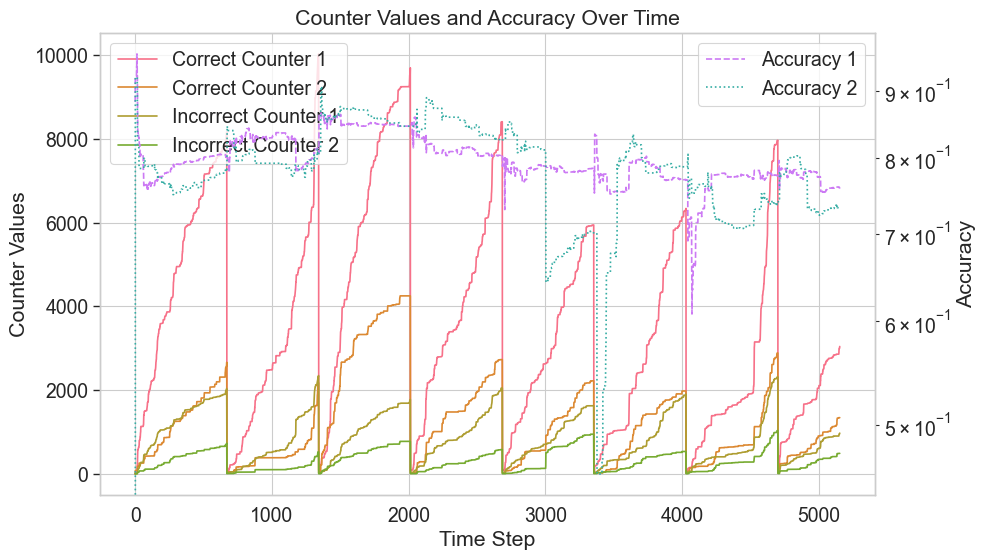

In [8]:



# Adjusting the plot to align both "counter values" and "accuracy" on a common x-axis

# Convert list of arrays to numpy arrays for easier plotting
counter_array_correct = np.array(counter_list_correct)
counter_array_incorrect = np.array(counter_list_incorrect)
accuracy_array = np.array(accuracy_list)

# Extracting individual counters for plotting
correct_counter_1 = counter_array_correct[:, 0]
correct_counter_2 = counter_array_correct[:, 1]
incorrect_counter_1 = counter_array_incorrect[:, 0]
incorrect_counter_2 = counter_array_incorrect[:, 1]
accuracy_1 = accuracy_array[:, 0]
accuracy_2 = accuracy_array[:, 1]
# Set a color palette
palette = sns.color_palette("husl", 10)

# Plotting both counter values and accuracy on a common x-axis using subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot counters (correct and incorrect)
ax1.plot(correct_counter_1, label='Correct Counter 1', color=palette[0])
ax1.plot(correct_counter_2, label='Correct Counter 2', color=palette[1])
ax1.plot(incorrect_counter_1, label='Incorrect Counter 1', color=palette[2])
ax1.plot(incorrect_counter_2, label='Incorrect Counter 2', color=palette[3])
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Counter Values')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(accuracy_1, label='Accuracy 1', color=palette[8], linestyle='dashed')
ax2.plot(accuracy_2, label='Accuracy 2', color=palette[5], linestyle='dotted')
ax2.set_ylabel('Accuracy')
ax2.set_yscale('log')
ax2.legend(loc='upper right')

# Title and layout
plt.title('Counter Values and Accuracy Over Time')
plt.grid(True)
plt.show()




In [9]:
print(counter_list_correct[:20])

[array([15.,  0.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([24., 82.]), array([31., 82.]), array([31., 82.]), array([48., 82.]), array([145.,  82.]), array([202.,  82.]), array([207., 138.]), array([313., 182.]), array([526., 182.]), array([579., 182.])]
